In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy
import seaborn as sns
import os
import re
%matplotlib inline

In [2]:
data_2D = pd.read_csv("test.csv")
data_2D

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0
5,4.0,4.0
6,4.0,5.0
7,4.0,6.0
8,4.5,1.0
9,4.5,6.0


In [3]:
data_2D - data_2D.min(axis=0)

,X,Y
0,0.0,3.0
1,1.0,2.5
2,1.0,0.0
3,2.0,0.0
4,2.0,1.0
5,4.0,3.0
6,4.0,4.0
7,4.0,5.0
8,4.5,0.0
9,4.5,5.0


In [4]:
data_2D.max(axis=0) - data_2D.min(axis=0)

X    7.0
Y    5.0
dtype: float64

In [5]:
def normalisation(df):
    return (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))

In [6]:
norm = normalisation(data_2D)
norm

,X,Y
0,0.000000,0.6
1,0.142857,0.5
2,0.142857,0.0
3,0.285714,0.0
4,0.285714,0.2
5,0.571429,0.6
6,0.571429,0.8
7,0.571429,1.0
8,0.642857,0.0
9,0.642857,1.0


In [7]:
def dist_euclidienne(e1, e2):
    return np.sqrt(((e2 - e1)**2).sum())

In [8]:
assert dist_euclidienne(norm.iloc[0],norm.iloc[7]) == 0.6975174637562116

In [9]:
#def centroide(df):
#    return (df.sum() / df.shape[0]).to_frame().T

In [10]:
centroide(norm)

,X,Y
0,0.510204,0.45


In [11]:
def inertie_cluster(df):
    c = centroide(df)
    res = 0
    for e in df.values:
        res += (dist_euclidienne(e, c)**2)
    return res.sum()

In [12]:
inertie_cluster(norm)

2.975991253644315

In [13]:
def initialisation(K, df):
    return df.sample(n=K, axis=0)

In [14]:
Centroides_test = initialisation(3,norm)
Centroides_test

,X,Y
1,0.142857,0.5
10,0.714286,0.0
12,0.857143,0.2


In [15]:
def plus_proche(e, df):
    res = []
    df.apply(lambda x : res.append(dist_euclidienne(x,e)), axis=1)
    return res.index(min(res))

In [16]:
for i in range(0,len(norm)):
    pproche = plus_proche(norm.iloc[i],Centroides_test)
    print("Exemple ",i,": (",norm.iloc[i]['X'],",", norm.iloc[i]['Y'], ")",\
          "est plus proche du centroide",pproche, ": (",Centroides_test.iloc[pproche]['X'],", ", \
          Centroides_test.iloc[pproche]['Y'],")")

Exemple  0 : ( 0.0 , 0.6 ) est plus proche du centroide 0 : ( 0.14285714285714285 ,  0.5 )
Exemple  1 : ( 0.14285714285714285 , 0.5 ) est plus proche du centroide 0 : ( 0.14285714285714285 ,  0.5 )
Exemple  2 : ( 0.14285714285714285 , 0.0 ) est plus proche du centroide 0 : ( 0.14285714285714285 ,  0.5 )
Exemple  3 : ( 0.2857142857142857 , 0.0 ) est plus proche du centroide 1 : ( 0.7142857142857143 ,  0.0 )
Exemple  4 : ( 0.2857142857142857 , 0.2 ) est plus proche du centroide 0 : ( 0.14285714285714285 ,  0.5 )
Exemple  5 : ( 0.5714285714285714 , 0.6 ) est plus proche du centroide 0 : ( 0.14285714285714285 ,  0.5 )
Exemple  6 : ( 0.5714285714285714 , 0.8 ) est plus proche du centroide 0 : ( 0.14285714285714285 ,  0.5 )
Exemple  7 : ( 0.5714285714285714 , 1.0 ) est plus proche du centroide 0 : ( 0.14285714285714285 ,  0.5 )
Exemple  8 : ( 0.6428571428571429 , 0.0 ) est plus proche du centroide 1 : ( 0.7142857142857143 ,  0.0 )
Exemple  9 : ( 0.6428571428571429 , 1.0 ) est plus proche du 

In [17]:
def affecte_cluster(train, c):
    dico = dict()
    for i in range(len(c.index)):
        dico[i] = []
    for t in range(len(train.index)):
        pp = plus_proche(train.iloc[t],c)
        dico[pp].append(t)
    return dico

In [18]:
DictAffect = affecte_cluster(norm, Centroides_test)
DictAffect

{0: [0, 1, 2, 4, 5, 6, 7, 9], 1: [3, 8, 10], 2: [11, 12, 13]}

In [19]:
def nouveaux_centroides(train, m):
    l = []
    for k in m.keys():
        cd = train.iloc[m[k], :]
        moys = cd.mean()
        l.append(moys)
    return pd.DataFrame(l, columns = list(train))

In [20]:
nouveaux_centroides(norm, DictAffect)

,X,Y
0,0.366071,0.587500
1,0.547619,0.000000
2,0.857143,0.533333


In [21]:
def inertie_globale(train, m):
    res = 0
    for k in m.keys():
        cd = train.iloc[m[k], :]
        res += inertie_cluster(cd)
    return res

In [22]:
inertie_globale(norm,DictAffect)

1.6649149659863944

In [23]:
def kmoyennes(K, train, e, iter_max):
    p = initialisation(K, train)
    m = affecte_cluster(train, p)
    p = nouveaux_centroides(train, m)
    j = inertie_globale(train, m)
    for i in range(iter_max):
        m = affecte_cluster(train, p)
        p = nouveaux_centroides(train, m)
        j2 = inertie_globale(train, m)
        dif = np.abs(j2 - j)
        print("iteration ", i+1 ," Inertie : ", j2, " Difference:", dif)
        if dif < e:
            break
        j = j2
    return p, m

In [24]:
les_centres, l_affectation = kmoyennes(2, norm, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

iteration  1  Inertie :  1.427942176870748  Difference: 0.3912721088435376
iteration  2  Inertie :  1.427942176870748  Difference: 0.0
Affichage des centres:            X         Y
0  0.488095  0.066667
1  0.526786  0.737500
Affichage des affectations:  {0: [2, 3, 4, 8, 10, 12], 1: [0, 1, 5, 6, 7, 9, 11, 13]}


In [25]:
def affiche_resultat(df, c, m):
    colors = cm.rainbow(np.linspace(0, 1, len(m.keys())+1))
    for i in m.keys():
        x = []
        y = []
        tab = m[i]
        for e in tab:
            stock = df.iloc[e]
            x.append(stock['X'])
            y.append(stock['Y'])
        plt.scatter(x, y, color=colors[i])
    plt.scatter(c['X'],c['Y'],color=colors[len(m.keys())],marker='x')
    plt.show()

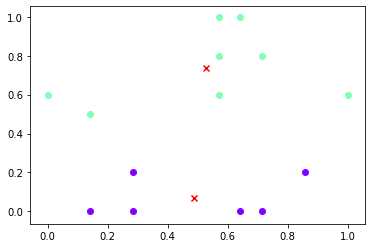

In [26]:
affiche_resultat(norm,les_centres,l_affectation)

In [27]:
def dist_manhattan(e1, e2):
    return np.abs(e2 - e1).sum()

In [28]:
def dist_vect(s, v1, v2):
    if s == "euclidienne":
        return dist_euclidienne(v1, v2)
    elif s == "manhattan":
        return dist_manhattan(v1, v2)

In [43]:
def centroide(m):
    if isinstance(m,list):
        return m[0]
    s = np.sum(m, axis=0)
    return s / m.shape[0]

In [30]:
def dist_groupes(s, gv1, gv2):
    cv1 = centroide(gv1)
    cv2 = centroide(gv2)
    if s == "euclidienne":
        return dist_euclidienne(cv1, cv2)
    elif s == "manhattan":
        return dist_manhattan(cv1, cv2)

In [31]:
def initialise(M):
    dico = dict()
    for i in range(M.shape[0]):
        dico[i] = [M.iloc[i]]
    return dico

In [32]:
print(initialise(norm))

{0: [X    0.0
Y    0.6
Name: 0, dtype: float64], 1: [X    0.142857
Y    0.500000
Name: 1, dtype: float64], 2: [X    0.142857
Y    0.000000
Name: 2, dtype: float64], 3: [X    0.285714
Y    0.000000
Name: 3, dtype: float64], 4: [X    0.285714
Y    0.200000
Name: 4, dtype: float64], 5: [X    0.571429
Y    0.600000
Name: 5, dtype: float64], 6: [X    0.571429
Y    0.800000
Name: 6, dtype: float64], 7: [X    0.571429
Y    1.000000
Name: 7, dtype: float64], 8: [X    0.642857
Y    0.000000
Name: 8, dtype: float64], 9: [X    0.642857
Y    1.000000
Name: 9, dtype: float64], 10: [X    0.714286
Y    0.000000
Name: 10, dtype: float64], 11: [X    0.714286
Y    0.800000
Name: 11, dtype: float64], 12: [X    0.857143
Y    0.200000
Name: 12, dtype: float64], 13: [X    1.0
Y    0.6
Name: 13, dtype: float64]}


In [33]:
def fusionne(s, dic):
    k = list(dic.keys())
    res = dic
    c1 = 0
    c2 = 0
    d = float('inf')
    for i in dic.keys():
        for j in dic.keys():
            if i == j:
                continue
            db = dist_groupes(s, dic[i], dic[j])
            if db < d:
                #print("db ", db, "dic i ", dic[i], "dic j ", dic[j])
                c1 = i
                c2 = j
                d = db
    print("Fusion de ",c1," et ",c2,"pour une distance de ",d)
    m = max(dic.keys())+1
    # l = res.pop(c1) + res.pop(c2)
    #l = res[c1] + res[c2]
    #print("test res c1 ",res[c1],"test res c2 ",res[c2])
    l = np.concatenate([res[c1], res[c2]])
    del res[c1]
    del res[c2]
    res[m] = l
    #print(res)
    return (res, c1, c2, d)

In [34]:
def clustering_hierarchique(train, s):
    courant = initialise(train)       # clustering courant, au départ:s données data_2D normalisées
    M_Fusion = []                        # initialisation
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        new,k1,k2,dist_min = fusionne(s,courant)
        if(len(M_Fusion)==0):
            M_Fusion = [k1,k2,dist_min,2]
        else:
            M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
        courant = new
        
    plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
    plt.title('Dendrogramme', fontsize=25)    
    plt.xlabel('Exemple', fontsize=25)
    plt.ylabel('Distance', fontsize=25)

    # Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        M_Fusion,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )
    plt.show()
    return M_Fusion

Fusion de  8  et  10 pour une distance de  0.0714285714285714
Fusion de  7  et  9 pour une distance de  0.07142857142857151
Fusion de  2  et  3 pour une distance de  0.14285714285714285
Fusion de  6  et  11 pour une distance de  0.1428571428571429
Fusion de  15  et  17 pour une distance de  0.23571428571428554
Fusion de  0  et  1 pour une distance de  0.24285714285714283
Fusion de  4  et  16 pour une distance de  0.27142857142857146
Fusion de  5  et  18 pour une distance de  0.35357142857142854
Fusion de  12  et  14 pour une distance de  0.3785714285714285
Fusion de  20  et  22 pour une distance de  0.5000000000000001
Fusion de  13  et  21 pour une distance de  0.6257142857142859
Fusion de  19  et  24 pour une distance de  0.857142857142857
Fusion de  23  et  25 pour une distance de  0.7095238095238097


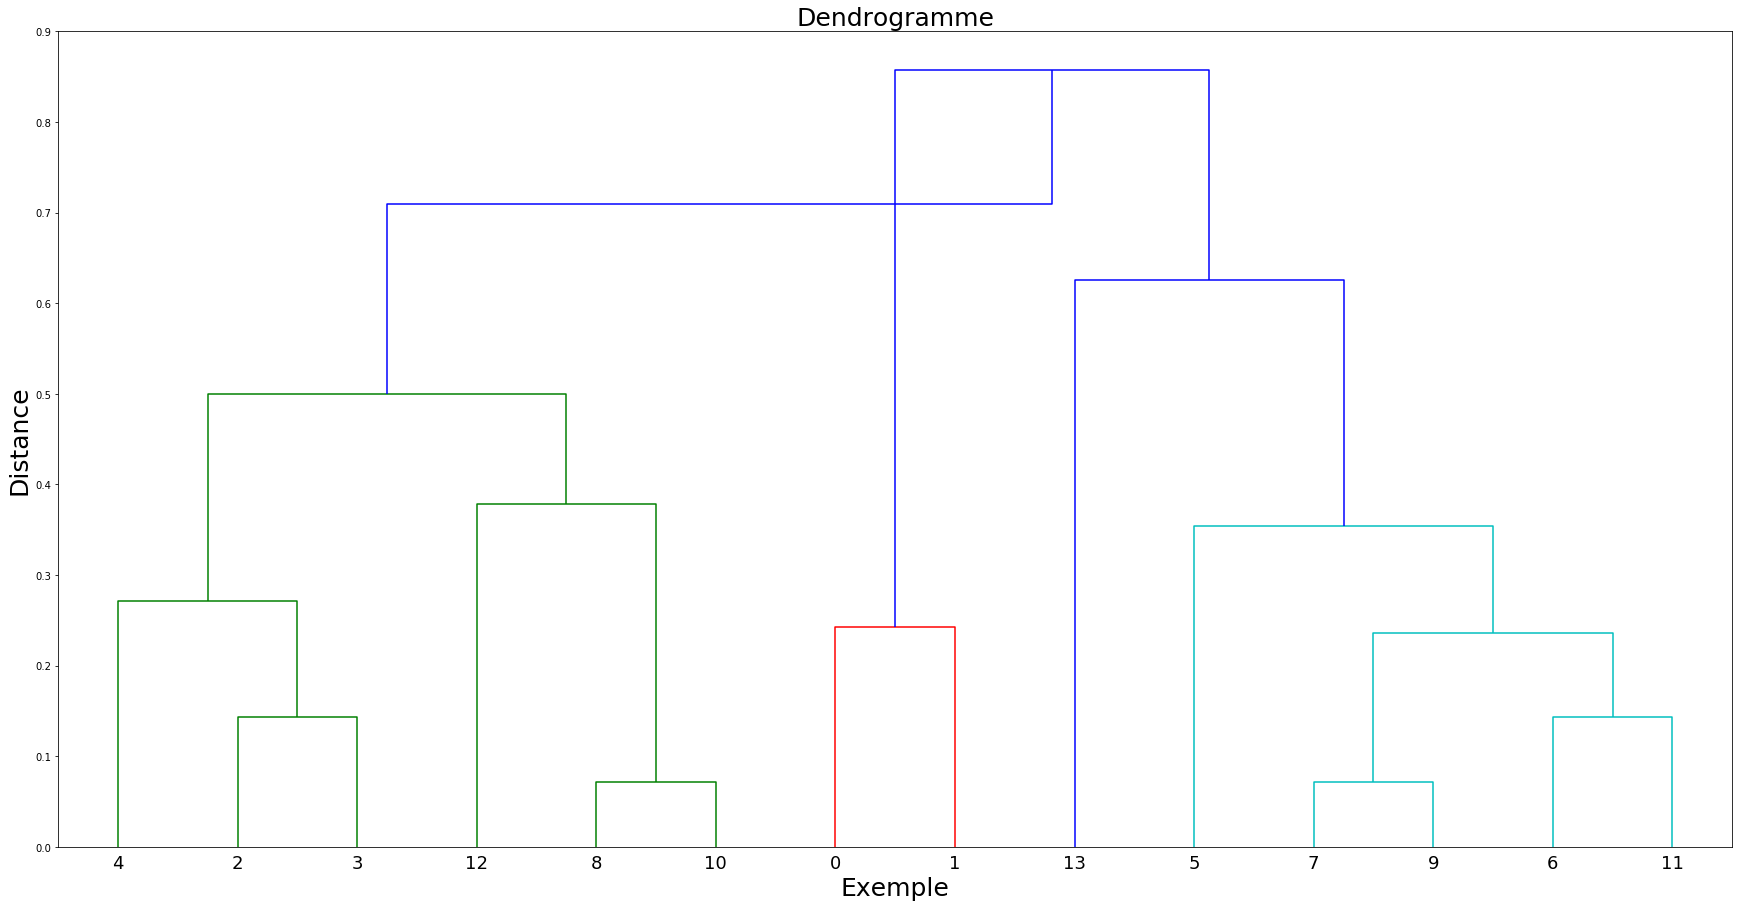

array([[ 8.        , 10.        ,  0.07142857,  2.        ],
       [ 7.        ,  9.        ,  0.07142857,  2.        ],
       [ 2.        ,  3.        ,  0.14285714,  2.        ],
       [ 6.        , 11.        ,  0.14285714,  2.        ],
       [15.        , 17.        ,  0.23571429,  2.        ],
       [ 0.        ,  1.        ,  0.24285714,  2.        ],
       [ 4.        , 16.        ,  0.27142857,  2.        ],
       [ 5.        , 18.        ,  0.35357143,  2.        ],
       [12.        , 14.        ,  0.37857143,  2.        ],
       [20.        , 22.        ,  0.5       ,  2.        ],
       [13.        , 21.        ,  0.62571429,  2.        ],
       [19.        , 24.        ,  0.85714286,  2.        ],
       [23.        , 25.        ,  0.70952381,  2.        ]])

In [44]:
clustering_hierarchique(norm, 'manhattan')

Fusion de  8  et  10 pour une distance de  0.0714285714285714
Fusion de  7  et  9 pour une distance de  0.07142857142857151
Fusion de  2  et  3 pour une distance de  0.14285714285714285
Fusion de  6  et  11 pour une distance de  0.1428571428571429
Fusion de  0  et  1 pour une distance de  0.17437936593905287
Fusion de  15  et  17 pour une distance de  0.20316375219039837
Fusion de  4  et  16 pour une distance de  0.21237241067597867
Fusion de  12  et  14 pour une distance de  0.26811891970176366
Fusion de  5  et  19 pour une distance de  0.3047456282855976
Fusion de  13  et  22 pour une distance de  0.4542857142857144
Fusion de  20  et  21 pour une distance de  0.5000000000000001
Fusion de  18  et  24 pour une distance de  0.638139657302555
Fusion de  23  et  25 pour une distance de  0.6796842379114776


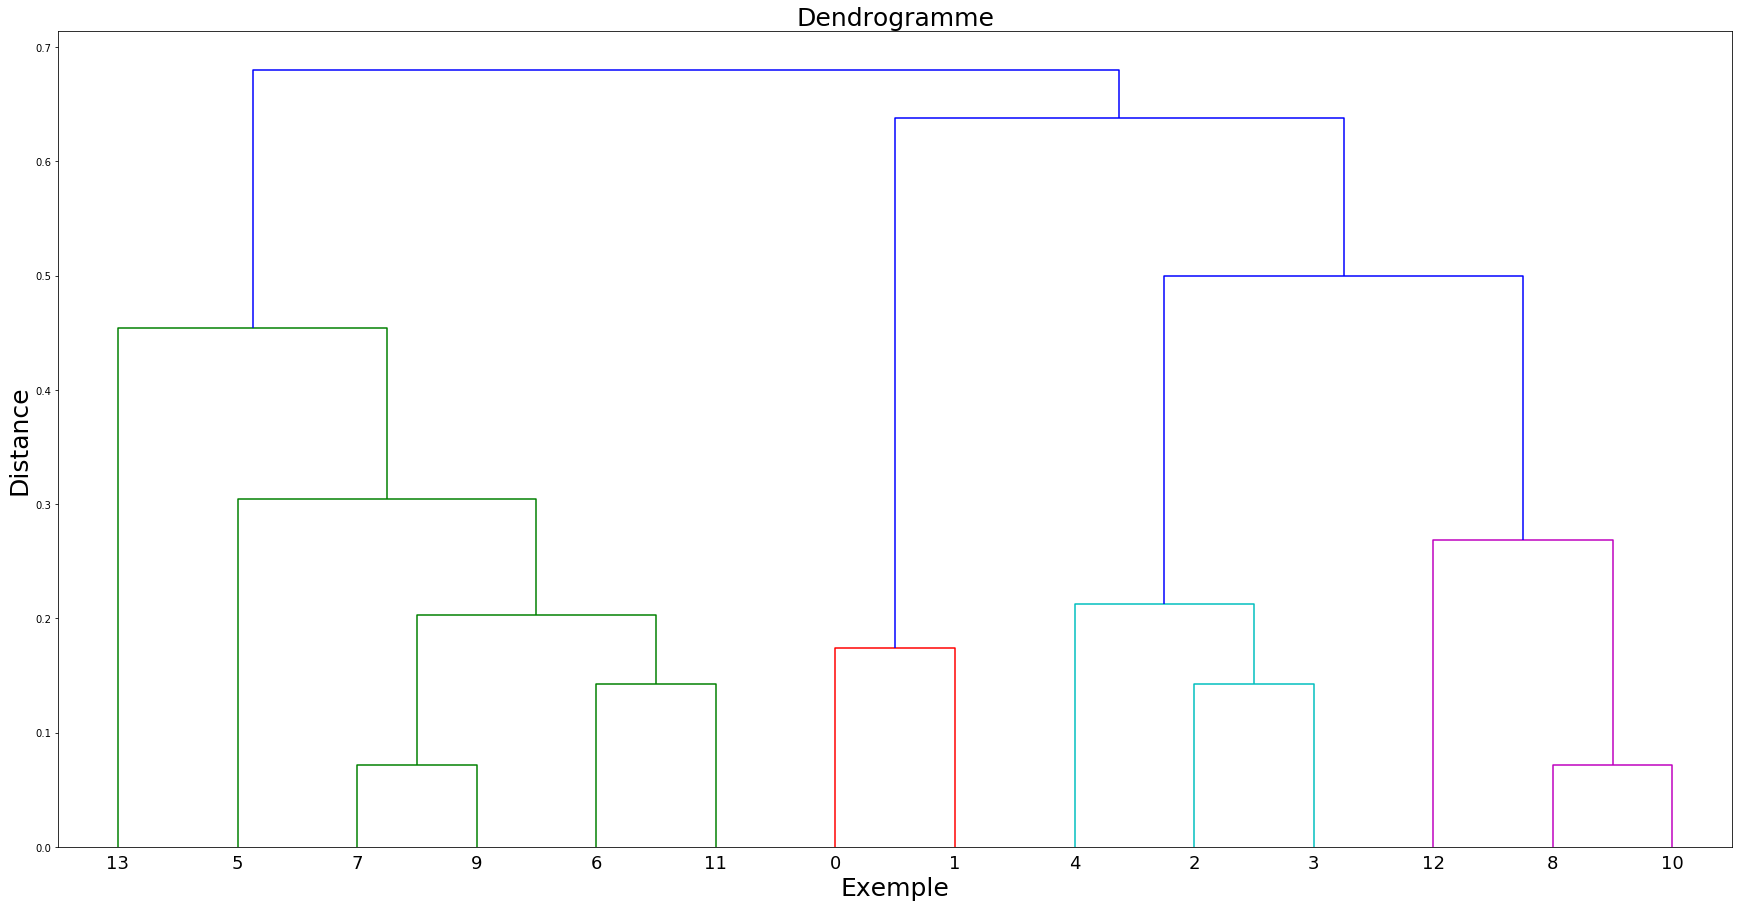

array([[ 8.        , 10.        ,  0.07142857,  2.        ],
       [ 7.        ,  9.        ,  0.07142857,  2.        ],
       [ 2.        ,  3.        ,  0.14285714,  2.        ],
       [ 6.        , 11.        ,  0.14285714,  2.        ],
       [ 0.        ,  1.        ,  0.17437937,  2.        ],
       [15.        , 17.        ,  0.20316375,  2.        ],
       [ 4.        , 16.        ,  0.21237241,  2.        ],
       [12.        , 14.        ,  0.26811892,  2.        ],
       [ 5.        , 19.        ,  0.30474563,  2.        ],
       [13.        , 22.        ,  0.45428571,  2.        ],
       [20.        , 21.        ,  0.5       ,  2.        ],
       [18.        , 24.        ,  0.63813966,  2.        ],
       [23.        , 25.        ,  0.67968424,  2.        ]])

In [45]:
clustering_hierarchique(norm, 'euclidienne')

In [46]:
data411 = pd.concat([pd.read_csv('../data/04-11_3.csv', sep=';'), pd.read_csv('../data/04-11_4.csv', sep=';'),
                    pd.read_csv('../data/04-11_5.csv', sep=';'), pd.read_csv('../data/04-11_6.csv', sep=';'),
                    pd.read_csv('../data/04-11_7.csv', sep=';')])

In [47]:
data411.head()

,Jour,Mois,Heure,Minutes,Secondes,Lieu,Couloir,Temperature,Humidite,Particules,Qualite,Son
0,11,4,22,25,0,3,0,25.0,47.0,0.0,123,72
1,11,4,22,25,0,3,0,25.0,47.0,0.0,23,72
2,11,4,22,25,0,3,0,24.0,47.0,0.0,23,72
3,11,4,22,25,0,3,0,24.0,47.0,0.0,22,72
4,11,4,22,25,0,3,0,24.0,47.0,0.0,23,72


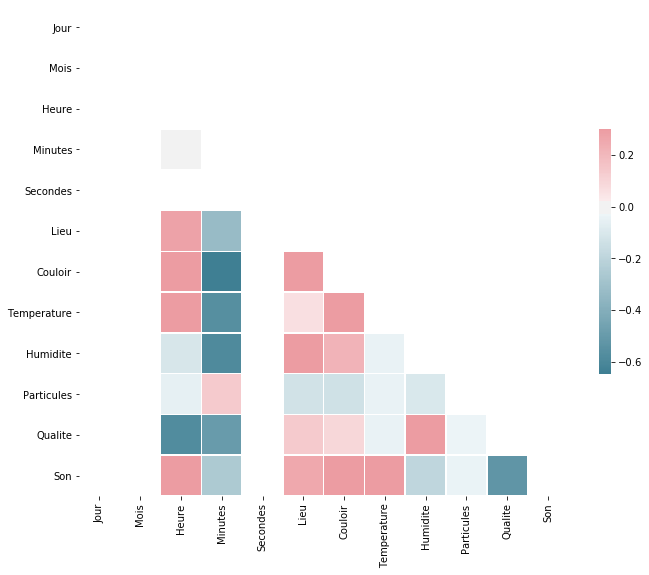

In [48]:
# Compute the correlation matrix
corr = data411.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [49]:
print(corr)

             Jour  Mois     Heure   Minutes  Secondes      Lieu   Couloir  \
Jour          NaN   NaN       NaN       NaN       NaN       NaN       NaN   
Mois          NaN   NaN       NaN       NaN       NaN       NaN       NaN   
Heure         NaN   NaN  1.000000 -0.011204       NaN  0.279922  0.544815   
Minutes       NaN   NaN -0.011204  1.000000       NaN -0.330199 -0.646241   
Secondes      NaN   NaN       NaN       NaN       NaN       NaN       NaN   
Lieu          NaN   NaN  0.279922 -0.330199       NaN  1.000000  0.784855   
Couloir       NaN   NaN  0.544815 -0.646241       NaN  0.784855  1.000000   
Temperature   NaN   NaN  0.429272 -0.560422       NaN  0.063561  0.577044   
Humidite      NaN   NaN -0.106633 -0.587153       NaN  0.333868  0.215334   
Particules    NaN   NaN -0.051838  0.134567       NaN -0.132103 -0.133805   
Qualite       NaN   NaN -0.576394 -0.498262       NaN  0.138875  0.090385   
Son           NaN   NaN  0.680897 -0.253724       NaN  0.256416  0.588103   

In [50]:
print(data411)

      Jour  Mois  Heure  Minutes  Secondes  Lieu  Couloir  Temperature  \
0       11     4     22       25         0     3        0         25.0   
1       11     4     22       25         0     3        0         25.0   
2       11     4     22       25         0     3        0         24.0   
3       11     4     22       25         0     3        0         24.0   
4       11     4     22       25         0     3        0         24.0   
...    ...   ...    ...      ...       ...   ...      ...          ...   
3844    11     4     23       25         0     7        1         25.0   
3845    11     4     23       25         0     7        1         25.0   
3846    11     4     23       25         0     7        1         25.0   
3847    11     4     23       25         0     7        1         25.0   
3848    11     4     23       25         0     7        1         25.0   

      Humidite  Particules  Qualite  Son  
0         47.0        0.00      123   72  
1         47.0        0.0

In [51]:
def __mask(df, key, i):
    m = tmp_listval[i]
    sd = tmp_std[i]
    return df[(df[key] <= m + sd) & (df[key] >= m - sd)]

listeData = []
listeFiles = os.listdir("../data/")
listeDates = []

i = 0
for e in listeFiles:
    if e == 'SG':
        continue
    searchName = re.search(r"([0-9]+-[0-9]+)_[0-9]+\.\w+", e)
    if searchName.group(1) not in listeDates:
        listeDates.append(searchName.group(1))
    tmp_file = pd.read_csv("../data/" + e, sep=';')
    tmp_file = tmp_file.dropna(axis='rows')

    # print(tmp_file.head())

    tmp_listval = []
    tmp_listval.append(tmp_file['Temperature'].mean())
    tmp_listval.append(tmp_file['Humidite'].mean())
    tmp_listval.append(tmp_file['Particules'].mean())
    tmp_listval.append(tmp_file['Qualite'].mean())
    tmp_listval.append(tmp_file['Son'].mean())

    tmp_std = []
    tmp_std.append(tmp_file['Temperature'].std())
    tmp_std.append(tmp_file['Humidite'].std())
    tmp_std.append(tmp_file['Particules'].std())
    tmp_std.append(tmp_file['Qualite'].std())
    tmp_std.append(tmp_file['Son'].std())

    tmp_file = __mask(tmp_file, 'Temperature', 0)
    tmp_file = __mask(tmp_file, 'Humidite', 1)
    tmp_file = __mask(tmp_file, 'Particules', 2)
    tmp_file = __mask(tmp_file, 'Qualite', 3)
    tmp_file = __mask(tmp_file, 'Son', 4)

    tmp_listval = []
    tmp_file.reset_index()
    tmp_listval.append(tmp_file.iloc[0].Jour)
    tmp_listval.append(tmp_file.iloc[0].Mois)
    tmp_listval.append(tmp_file.iloc[0].Heure)
    tmp_listval.append(tmp_file.iloc[0].Minutes)
    tmp_listval.append(tmp_file.iloc[0].Secondes)
    tmp_listval.append(tmp_file.iloc[0].Lieu)
    tmp_listval.append(tmp_file.iloc[0].Couloir)
    tmp_listval.append(tmp_file['Temperature'].mean())
    tmp_listval.append(tmp_file['Humidite'].mean())
    tmp_listval.append(tmp_file['Particules'].mean())
    tmp_listval.append(tmp_file['Qualite'].mean())
    tmp_listval.append(tmp_file['Son'].mean()) 

    listeData.append(tmp_listval)

listeData = pd.DataFrame(listeData, columns=['Jour', 'Mois', 'Heure', 'Minutes', 'Secondes', 'Lieu',
                                                               'Couloir', 'Temperature', 'Humidite', 'Particules',
                                                               'Qualite', 'Son'])
listeData['Couloir'] = listeData['Couloir'].astype(bool)
listeData[['Jour', 'Mois', 'Heure', 'Minutes', 'Secondes', 'Lieu']] = \
    listeData[['Jour', 'Mois', 'Heure', 'Minutes', 'Secondes', 'Lieu']].astype(np.int32)
listeData[['Temperature', 'Humidite', 'Particules', 'Qualite', 'Son']] = \
    listeData[['Temperature', 'Humidite', 'Particules', 'Qualite', 'Son']].astype(np.float64)


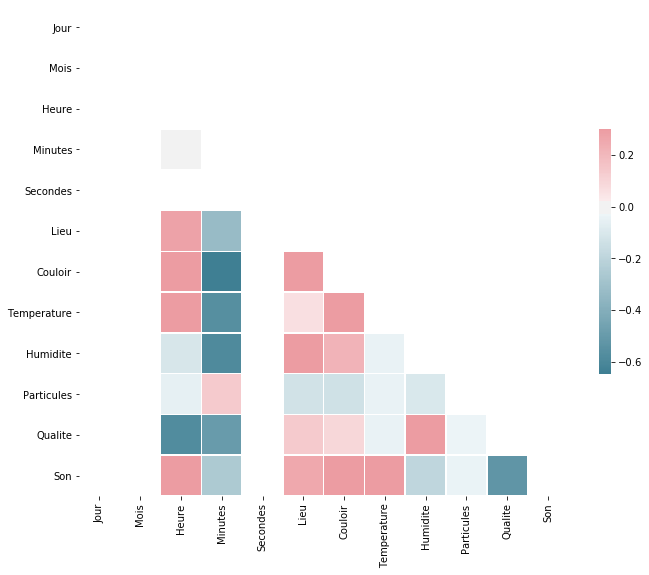

In [52]:
corrmoy = listeData.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [53]:
print(listeData.to_string())

    Jour  Mois  Heure  Minutes  Secondes  Lieu  Couloir  Temperature   Humidite  Particules    Qualite        Son
0     11     4     22       25         0     3    False    25.000000  46.000000   23.534508  19.651639  73.737705
1     11     4     22       50         0     4    False    25.000000  33.485356   44.036485  10.887029  74.146444
2     11     4     15       25         0     5    False    24.000000  44.577320   18.476460  41.838488  66.350515
3     11     4     21       45         0     6    False    24.000000  44.770161    7.499698  15.268145  71.419355
4     11     4     23       25         0     7     True    25.000000  43.610834   19.553721  21.385602  77.131860
5     12     4      0       50         0     1    False    23.564246  46.322626   19.571536  13.000000  75.177374
6     15     4     20       10         0     3    False    23.000000  37.000000   25.889782  20.318769  72.785501
7     15     4     21       10         0     4    False    23.000000  28.871705    9.949

In [54]:
listeDataNorm = normalisation(listeData[['Lieu', 'Temperature']])
print(listeDataNorm.to_string())

        Lieu  Temperature
0   0.333333     0.750000
1   0.500000     0.750000
2   0.666667     0.500000
3   0.833333     0.500000
4   1.000000     0.750000
5   0.000000     0.391061
6   0.333333     0.250000
7   0.500000     0.250000
8   0.666667     0.000000
9   0.833333     0.000000
10  1.000000     0.250000
11  0.000000     0.250000
12  0.333333     0.750000
13  0.500000     0.750000
14  0.666667     0.750000
15  0.833333     0.500000
16  1.000000     0.750000
17  0.000000     0.250000
18  0.333333     0.750000
19  0.500000     1.000000
20  0.666667     0.500000
21  0.833333     0.500000
22  1.000000     0.750000


In [55]:
lieuData = initialise(listeData[['Jour','Lieu']])
print(lieuData)

{0: [Jour    11
Lieu     3
Name: 0, dtype: int32], 1: [Jour    11
Lieu     4
Name: 1, dtype: int32], 2: [Jour    11
Lieu     5
Name: 2, dtype: int32], 3: [Jour    11
Lieu     6
Name: 3, dtype: int32], 4: [Jour    11
Lieu     7
Name: 4, dtype: int32], 5: [Jour    12
Lieu     1
Name: 5, dtype: int32], 6: [Jour    15
Lieu     3
Name: 6, dtype: int32], 7: [Jour    15
Lieu     4
Name: 7, dtype: int32], 8: [Jour    15
Lieu     5
Name: 8, dtype: int32], 9: [Jour    15
Lieu     6
Name: 9, dtype: int32], 10: [Jour    15
Lieu     7
Name: 10, dtype: int32], 11: [Jour    18
Lieu     1
Name: 11, dtype: int32], 12: [Jour    18
Lieu     3
Name: 12, dtype: int32], 13: [Jour    18
Lieu     4
Name: 13, dtype: int32], 14: [Jour    18
Lieu     5
Name: 14, dtype: int32], 15: [Jour    18
Lieu     6
Name: 15, dtype: int32], 16: [Jour    18
Lieu     7
Name: 16, dtype: int32], 17: [Jour    23
Lieu     1
Name: 17, dtype: int32], 18: [Jour    23
Lieu     3
Name: 18, dtype: int32], 19: [Jour    23
Lieu     4
Name

Fusion de  0  et  12 pour une distance de  0.0
Fusion de  1  et  13 pour une distance de  0.0
Fusion de  2  et  20 pour une distance de  0.0
Fusion de  3  et  15 pour une distance de  0.0
Fusion de  4  et  16 pour une distance de  0.0
Fusion de  11  et  17 pour une distance de  0.0
Fusion de  18  et  23 pour une distance de  0.0
Fusion de  21  et  26 pour une distance de  0.0
Fusion de  22  et  27 pour une distance de  0.0
Fusion de  5  et  28 pour une distance de  0.1410614525139664
Fusion de  14  et  24 pour une distance de  0.16666666666666663
Fusion de  6  et  7 pour une distance de  0.16666666666666669
Fusion de  8  et  9 pour une distance de  0.16666666666666674
Fusion de  25  et  30 pour une distance de  0.16666666666666674
Fusion de  29  et  33 pour une distance de  0.22222222222222215
Fusion de  19  et  37 pour une distance de  0.3055555555555556
Fusion de  32  et  34 pour une distance de  0.4636871508379888
Fusion de  10  et  36 pour une distance de  0.4833333333333333
Fusion

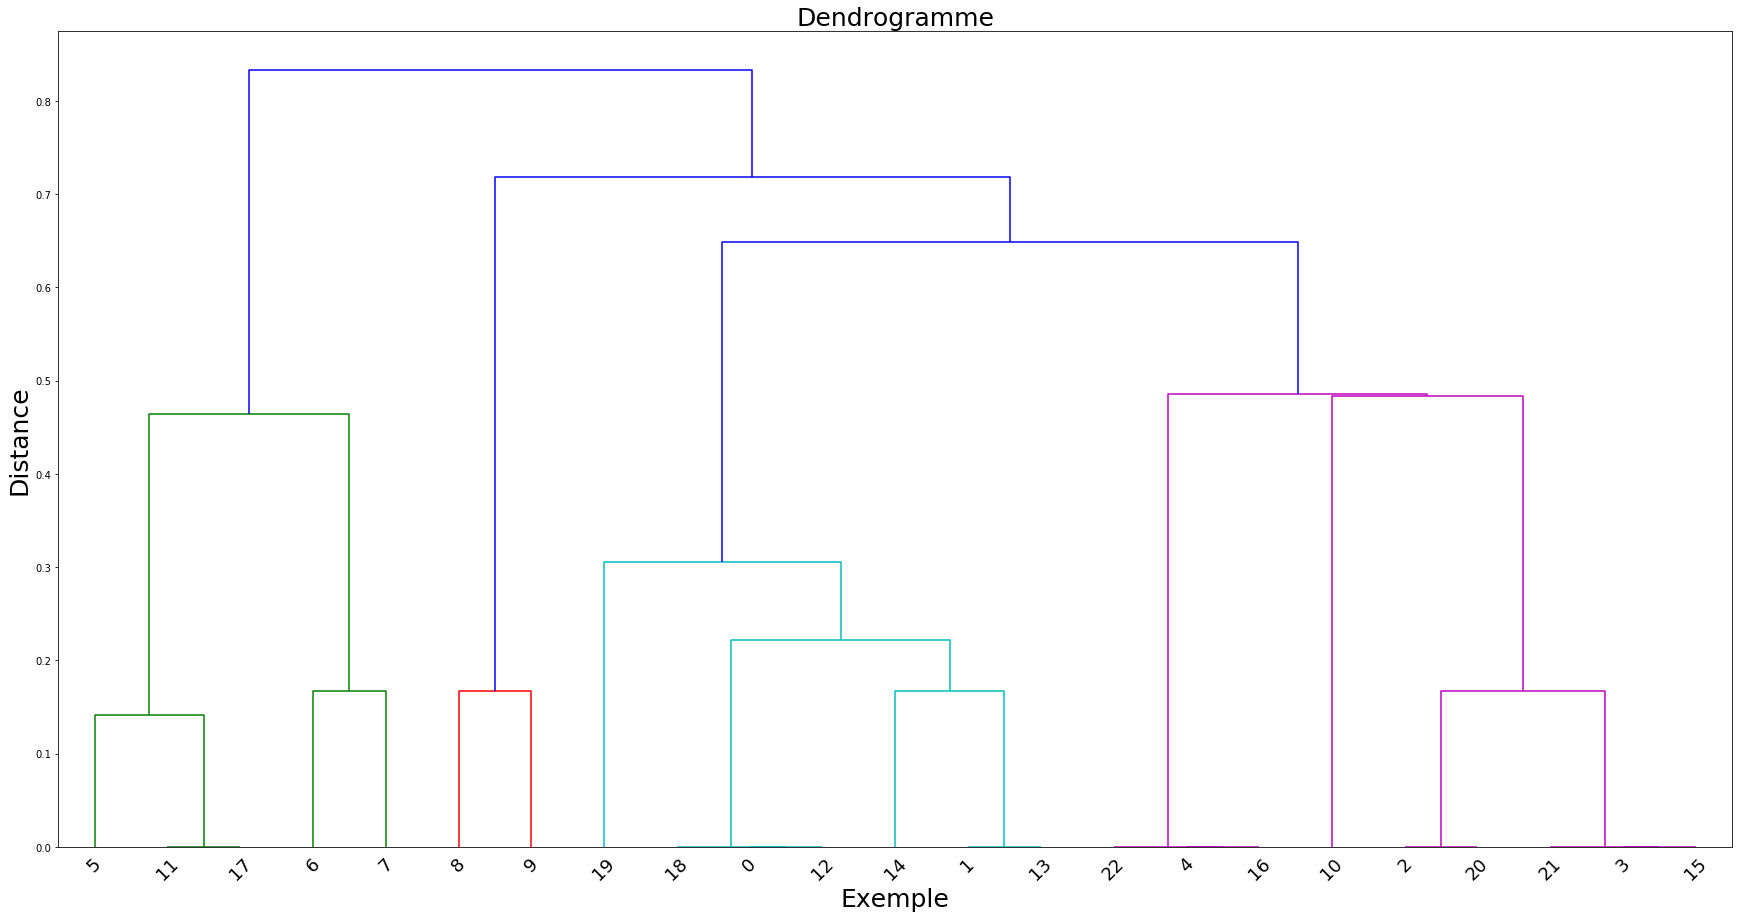

array([[ 0.        , 12.        ,  0.        ,  2.        ],
       [ 1.        , 13.        ,  0.        ,  2.        ],
       [ 2.        , 20.        ,  0.        ,  2.        ],
       [ 3.        , 15.        ,  0.        ,  2.        ],
       [ 4.        , 16.        ,  0.        ,  2.        ],
       [11.        , 17.        ,  0.        ,  2.        ],
       [18.        , 23.        ,  0.        ,  2.        ],
       [21.        , 26.        ,  0.        ,  2.        ],
       [22.        , 27.        ,  0.        ,  2.        ],
       [ 5.        , 28.        ,  0.14106145,  2.        ],
       [14.        , 24.        ,  0.16666667,  2.        ],
       [ 6.        ,  7.        ,  0.16666667,  2.        ],
       [ 8.        ,  9.        ,  0.16666667,  2.        ],
       [25.        , 30.        ,  0.16666667,  2.        ],
       [29.        , 33.        ,  0.22222222,  2.        ],
       [19.        , 37.        ,  0.30555556,  2.        ],
       [32.        , 34.

In [56]:
clustering_hierarchique(listeDataNorm, 'manhattan')

In [57]:
for key, value in initialise(listeDataNorm).items():
    print(key, ' : ', value)

0  :  [Lieu           0.333333
Temperature    0.750000
Name: 0, dtype: float64]
1  :  [Lieu           0.50
Temperature    0.75
Name: 1, dtype: float64]
2  :  [Lieu           0.666667
Temperature    0.500000
Name: 2, dtype: float64]
3  :  [Lieu           0.833333
Temperature    0.500000
Name: 3, dtype: float64]
4  :  [Lieu           1.00
Temperature    0.75
Name: 4, dtype: float64]
5  :  [Lieu           0.000000
Temperature    0.391061
Name: 5, dtype: float64]
6  :  [Lieu           0.333333
Temperature    0.250000
Name: 6, dtype: float64]
7  :  [Lieu           0.50
Temperature    0.25
Name: 7, dtype: float64]
8  :  [Lieu           0.666667
Temperature    0.000000
Name: 8, dtype: float64]
9  :  [Lieu           0.833333
Temperature    0.000000
Name: 9, dtype: float64]
10  :  [Lieu           1.00
Temperature    0.25
Name: 10, dtype: float64]
11  :  [Lieu           0.00
Temperature    0.25
Name: 11, dtype: float64]
12  :  [Lieu           0.333333
Temperature    0.750000
Name: 12, dtype: flo

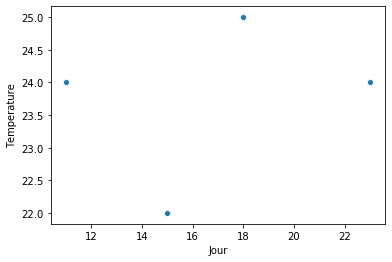

In [58]:
sns.scatterplot(x = 'Jour',
                y = 'Temperature',
                data = listeData[listeData['Lieu'] == 5])
plt.show()

In [59]:
listeData[['Jour', 'Temperature']].loc[listeData['Lieu'] == 5]

,Jour,Temperature
2,11,24.0
8,15,22.0
14,18,25.0
20,23,24.0


In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
linear_model = LinearRegression(normalize=True)

In [62]:
linear_model.fit(listeData[['Jour']].loc[listeData['Lieu'] == 5], listeData[['Temperature']].loc[listeData['Lieu'] == 5])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [63]:
y_pred_linear = linear_model.predict(listeData[['Jour']].loc[listeData['Lieu'] == 4])

In [64]:
plt.scatter(,listeData[['Temperature']].loc[listeData['Lieu'] == 5],edgecolors=(0,0,0),lw=2,s=80)
plt.plot(listeData[['Jour']].loc[listeData['Lieu'] == 5],y_pred_linear, 'k--', lw=2)

SyntaxError: invalid syntax (<ipython-input-64-d0ee5ce840cd>, line 1)

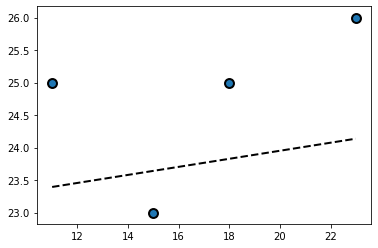

In [65]:
plt.scatter(listeData[['Jour']].loc[listeData['Lieu'] == 4],listeData[['Temperature']].loc[listeData['Lieu'] == 4],edgecolors=(0,0,0),lw=2,s=80)
plt.plot(listeData[['Jour']].loc[listeData['Lieu'] == 4],y_pred_linear, 'k--', lw=2)

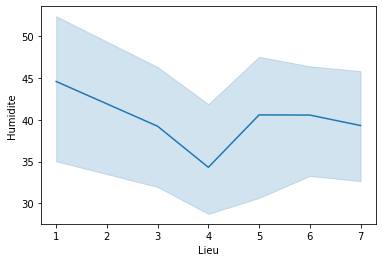

In [66]:
sns.lineplot(x = 'Lieu',
             y = 'Humidite',
             data = listeData)
plt.show()

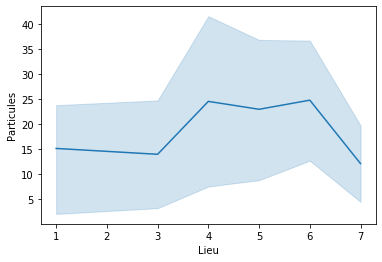

In [67]:
sns.lineplot(x = 'Lieu',
             y = 'Particules',
             data = listeData)
plt.show()

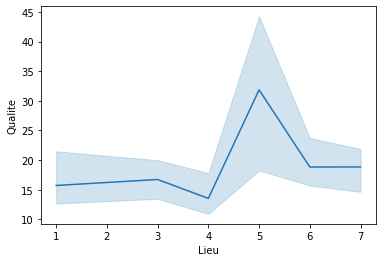

In [68]:
sns.lineplot(x = 'Lieu',
             y = 'Qualite',
             data = listeData)
plt.show()

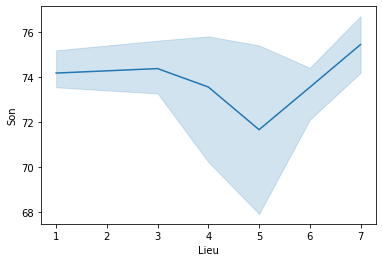

In [69]:
sns.lineplot(x = 'Lieu',
             y = 'Son',
             data = listeData)
plt.show()

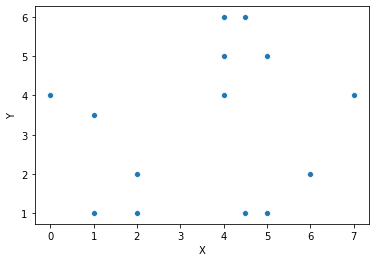

In [70]:
sns.scatterplot(x = 'X',
                y = 'Y',
                data = data_2D)
plt.show()

In [71]:
data_2D

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0
5,4.0,4.0
6,4.0,5.0
7,4.0,6.0
8,4.5,1.0
9,4.5,6.0


$$\sum_n x_i$$

In [72]:
data_2D.X.sum()

50.0

$$\sum_n y_i$$

In [73]:
data_2D.Y.sum()

45.5

$$\sum_n x_i^2$$

In [74]:
np.square(data_2D.X)

0      0.00
1      1.00
2      1.00
3      4.00
4      4.00
5     16.00
6     16.00
7     16.00
8     20.25
9     20.25
10    25.00
11    25.00
12    36.00
13    49.00
Name: X, dtype: float64

In [75]:
np.square(data_2D.X).sum()

233.5

$$\sum_n x_i^3$$

In [76]:
np.power(data_2D.X, 3)

0       0.000
1       1.000
2       1.000
3       8.000
4       8.000
5      64.000
6      64.000
7      64.000
8      91.125
9      91.125
10    125.000
11    125.000
12    216.000
13    343.000
Name: X, dtype: float64

In [77]:
np.power(data_2D.X, 3).sum()

1201.25

$$\sum_n x_i^4$$

In [78]:
np.power(data_2D.X, 4)

0        0.0000
1        1.0000
2        1.0000
3       16.0000
4       16.0000
5      256.0000
6      256.0000
7      256.0000
8      410.0625
9      410.0625
10     625.0000
11     625.0000
12    1296.0000
13    2401.0000
Name: X, dtype: float64

In [79]:
np.power(data_2D.X, 4).sum()

6569.125

$$\sum_n x_iy_i$$

In [80]:
data_2D.prod(axis=1)

0      0.0
1      3.5
2      1.0
3      2.0
4      4.0
5     16.0
6     20.0
7     24.0
8      4.5
9     27.0
10     5.0
11    25.0
12    12.0
13    28.0
dtype: float64

In [81]:
data_2D.prod(axis=1).sum()

172.0

$$\sum_n x_i^2y_i$$

In [82]:
np.square(data_2D.X).multiply(data_2D.Y)

0       0.00
1       3.50
2       1.00
3       4.00
4       8.00
5      64.00
6      80.00
7      96.00
8      20.25
9     121.50
10     25.00
11    125.00
12     72.00
13    196.00
dtype: float64

In [83]:
np.square(data_2D.X).multiply(data_2D.Y).sum()

816.25

$$
\begin{equation}
  \left\{
      \begin{aligned}
        \sum_n y_i = nB_0 + B_1\sum_n x_i + B_2\sum_n x_i^2 \\
        \sum_n x_iy_i = B_0\sum_n x_i + B_1\sum_n x_i^2 + B_2\sum_n x_i^3\\
        \sum_n x_i^2y_i = B_0\sum_n x_i^2 + B_1\sum_n x_i^3 + B_1\sum_n x_i^4
      \end{aligned}
    \right.
\end{equation}
$$

In [84]:
values = np.array([data_2D.Y.sum(), data_2D.prod(axis=1).sum(), np.square(data_2D.X).multiply(data_2D.Y).sum()])
coefs = np.array([[data_2D.shape[0], data_2D.X.sum(), np.square(data_2D.X).sum()], 
                  [data_2D.X.sum(), np.square(data_2D.X).sum(), np.power(data_2D.X, 3).sum()],
                  [np.square(data_2D.X).sum(), np.power(data_2D.X, 3).sum(), np.power(data_2D.X, 4).sum()]])

In [85]:
res = np.linalg.solve(coefs, values)
res

array([ 2.42922401,  0.36146212, -0.02818947])

In [86]:
res[0]*14 + res[1]*50 + res[2]*233.5

45.5

In [87]:
res[0]*50 + res[1]*233.5 + res[2]*1201.25

172.0

In [88]:
res[0]* 233.5 + res[1]* 1201.25 + res[2]*6569.125

816.2500000000001

In [89]:
def coef_poly(df):
    if df.shape[1] != 2:
        return
    df.columns = ['X', 'Y']
    sx = df.X.sum()
    sx2 = np.square(df.X).sum()
    sx3 = np.power(df.X, 3).sum()
    values = np.array([df.Y.sum(), df.prod(axis=1).sum(), np.square(df.X).multiply(df.Y).sum()])
    coefs = np.array([[df.shape[0], sx, sx2], 
                      [sx, sx2, sx3],
                      [sx2, sx3, np.power(df.X, 4).sum()]])
    return np.linalg.solve(coefs, values)

$$a = \frac{cov(X, Y)}{V(X)}$$
  
$$b = \bar{y} - a\bar{x}$$

In [90]:
def coef_linea(df):
    if df.shape[1] != 2:
        return
    df.columns = ['X', 'Y']
    a = df.cov().X.iloc[1] / df.X.var()
    b = df.Y.mean() - a*df.X.mean()
    return [b,a]

In [91]:
def regress_poly(df, X):
    if df.shape[1] != 2:
        return
    df.columns = ['X', 'Y']
    res = coef_poly(df)
    return list(map(lambda x: res[0] + res[1]*x + res[2]*x**2, X))

In [92]:
regress_poly(data_2D, list(range(20)))

[2.4292240094890705,
 2.7624966586474207,
 3.0393903585876294,
 3.259905109309696,
 3.4240409108136216,
 3.5317977630994046,
 3.5831756661670457,
 3.5781746200165463,
 3.516794624647905,
 3.3990356800611212,
 3.224897786256196,
 2.9943809432331294,
 2.7074851509919204,
 2.3642104095325713,
 1.9645567188550785,
 1.5085240789594456,
 0.996112489845669,
 0.4273219515137523,
 -0.19784753603630634,
 -0.879395972804506]

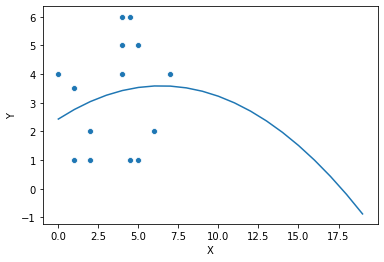

In [93]:
sns.scatterplot(x = 'X',
                y = 'Y',
                data = data_2D)

sns.lineplot(x = list(range(20)), 
             y = regress_poly(data_2D, list(range(20))))
plt.show()

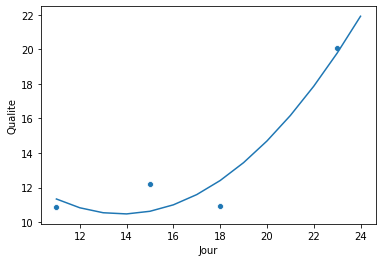

In [105]:
sns.scatterplot(x = 'Jour',
                y = 'Qualite',
                data = listeData.loc[listeData['Lieu'] == 4])

sns.lineplot(x = list(range(11, 25)), 
             y = regress_poly(listeData[['Jour', 'Qualite']].loc[listeData['Lieu'] == 4], list(range(11, 25))))
plt.show()

In [106]:
regress_poly(listeData[['Jour', 'Qualite']].loc[listeData['Lieu'] == 4], [16])[0]

11.00412923848425

In [95]:
def regress_linea(df, X):
    if df.shape[1] != 2:
        return
    df.columns = ['X', 'Y']
    res = coef_linea(df)
    return list(map(lambda x: res[0] + res[1]*x , X))

In [96]:
data_2D.X.var()

4.225274725274725

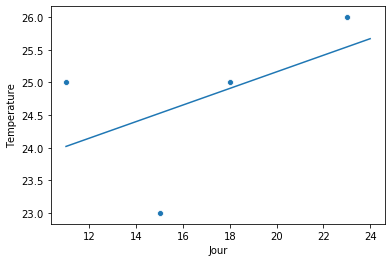

In [97]:
sns.scatterplot(x = 'Jour',
                y = 'Temperature',
                data = listeData.loc[listeData['Lieu'] == 4])

sns.lineplot(x = list(range(11, 25)), 
             y = regress_linea(listeData[['Jour', 'Temperature']].loc[listeData['Lieu'] == 4], list(range(11, 25))))
plt.show()

Coefficients de détermination

In [98]:
def linea_deter(df):
    if df.shape[1] != 2:
        return
    df.columns = ['X', 'Y']
    res = coef_linea(df)
    SYY = ((df.Y - df.Y.mean())**2).sum()
    # somme des carrés des résidus
    SR = ((df.Y - res[0] - res[1]*df.X)**2).sum()
    return 1 - SR/SYY

In [99]:
linea_deter(listeData[['Jour', 'Temperature']].loc[listeData['Lieu'] == 4])

0.26075775758614783

In [100]:
def poly_deter(df):
    if df.shape[1] != 2:
        return
    df.columns = ['X', 'Y']
    res = coef_poly(df)
    SR = ((df.Y - res[0] - res[1]*df.X - res[2]*df.X**2)**2).sum()
    SYY = ((df.Y - df.Y.mean())**2).sum()
    return 1 - SR/SYY

In [101]:
poly_deter(listeData[['Jour', 'Temperature']].loc[listeData['Lieu'] == 4])

0.6515517317062461